In [270]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt
from datetime import timedelta
from operator import attrgetter

In [208]:
sns.set(
    font_scale = 1, #Размер шрифта
    style      = "whitegrid", # общий вид графиков
    rc         = {'figure.figsize':(22,10)} # размер фигуры
)

In [209]:
customers_df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-g-georgij-45/first_project/olist_customers_dataset.csv')

In [210]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [211]:
customers_df.shape

(99441, 5)

In [212]:
orders_df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-g-georgij-45/first_project/olist_orders_dataset.csv')

In [213]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [214]:
orders_df.shape

(99441, 8)

## Задание_1: Сколько у нас пользователей, которые совершили покупку только один раз?

In [215]:
customer_order_df = orders_df.merge(customers_df, on = 'customer_id' ).fillna(0) 
#Объединяем датафрейм и заменяем NaN на 0

In [216]:
customer_order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


### Что должно считаться покупкой?

Я считаю что покупкой нужно считать завершенный заказ, т.е. заказ у которого в статусе заказа отмечено "delivered", потому что у меня нет оснований считать заказ завершенным без отметки, что он доставлен.

In [217]:
customer_order_df.query('order_delivered_customer_date == 0').order_status.value_counts()

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: order_status, dtype: int64

In [218]:
customer_order_df.query('order_status == "delivered" and order_delivered_customer_date == 0')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,0,2017-12-18 00:00:00,13467e882eb3a701826435ee4424f2bd,18520,cerquilho,SP
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,0,2018-07-16 00:00:00,2f17c5b324ad603491521b279a9ff4de,18255,quadra,SP
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,0,2018-07-30 00:00:00,1bd06a0c0df8b23dacfd3725d2dc0bb9,12445,pindamonhangaba,SP
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,0,2018-07-30 00:00:00,3bc508d482a402715be4d5cf4020cc81,13170,sumare,SP
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,0,2018-07-24 00:00:00,ebf7e0d43a78c81991a4c59c145c75db,13560,sao carlos,SP
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,0,0,2017-06-23 00:00:00,d77cf4be2654aa70ef150f8bfec076a6,91330,porto alegre,RS
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,0,2018-06-26 00:00:00,cce5e8188bf42ffb3bb5b18ff58f5965,7261,guarulhos,SP
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,0,2018-07-19 00:00:00,175378436e2978be55b8f4316bce4811,9431,ribeirao pires,SP


Как видно из отбора выше - есть 8 заказов со статусом 'delivered', но не имеющие дату доставки. Будем считать , что произошел какой-то сбой. В расчет я буду брать заказы со статусом "delivered"

In [219]:
customer_order_df.query('order_status == "delivered"') \
    .groupby('customer_unique_id', as_index = False) \
    .agg({'order_id' : 'count'}) \
    .sort_values('order_id', ascending = False) \
    .query('order_id == 1').customer_unique_id.count()

90557

Количество пользователей, совершивших только одну покупку - 90 557

#### Ход решения: Объединил orders_df и customers_df , отобрал заказы со статусом "delivered" и оставил пользователей с одной покупкой

## Задание_2: Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

#### Введем в наш датасет новую колонку с обозначением месяца и года. Год нужен для подсчета числа уникальных месяцев за анализируемый период

In [220]:
customer_order_df.order_purchase_timestamp = customer_order_df.order_purchase_timestamp.astype("datetime64[ns]")

In [221]:
customer_order_df = customer_order_df.assign(numb_month = customer_order_df["order_purchase_timestamp"].dt.to_period("M"))

#### Для расчета среднемесячного числа не доставляемых заказов нам необходимо количество не доставленных заказов разделить на количество уникальных месяцев в анализируемом периоде

In [222]:
customer_order_df.numb_month.nunique() # Число уникальных месяцев в анализируемом периоде

25

In [223]:
customer_order_df.query('order_status != "delivered"').order_id.count()
# Количество не доставленных ордеров за анализируемый период

2963

In [224]:
(customer_order_df.query('order_status != "delivered"').order_id.count()/customer_order_df.numb_month.nunique()).round(0)

119.0

#### За анализируемый период в среднем не доставляется 119 заказов по разным причинам

#### Теперь соберем и проанализируем таблицу с заказами, которые не были доставлены:

In [225]:
df_month = customer_order_df.query('order_status != "delivered"').groupby('order_status', as_index = False) \
    .agg({'order_id' : 'count'}).rename(columns = {'order_id' : 'count_order_not_delivery'})

In [226]:
df_month = df_month.assign(average_per_month = df_month.count_order_not_delivery / customer_order_df.numb_month.nunique())
df_month = df_month.assign(percentage = df_month.count_order_not_delivery / df_month.count_order_not_delivery.sum() * 100).round(1)

In [227]:
df_month

,order_status,count_order_not_delivery,average_per_month,percentage
0,approved,2,0.1,0.1
1,canceled,625,25.0,21.1
2,created,5,0.2,0.2
3,invoiced,314,12.6,10.6
4,processing,301,12.0,10.2
5,shipped,1107,44.3,37.4
6,unavailable,609,24.4,20.6


### Оценочные причины, по которым не доставляются заказы: 
- Ордеры со статусом "approved" по какой-то причине не были переданы в логистическую службу, такие случаи происходят довольно редко, в среднем 0.1 случая в месяц;
- Ордеры со статусом "canceled" могли быть отменены как по вине исполнителя, так и по вине заказчика, потому что часть заказов имеет подтверждение оплаты покупателем, но заказ не был передан в логистическую службу. Также есть заказы с подтвержденной оплатой,которые были переданы в логистическую службу и даже назначена дата доставки, но в итоге все равно не доставлены. И еще по части заказов не подтверждена оплата, что говорит о отмене заказа из-за не оплаты пользователем. В среднем такие случаи происходят довольно часто в среднем 25 раз в месяц;
- Ордеры со статусом "created" не были оплачены заказчиками, такие случаи происходят в среднем 0.2 раза в месяц;
- Ордеры со статусом "invoiced" по какой-то причине не были переданы в логистическую службу. Подобные случаи происходят в среднем 12.6 раз в месяц;
- Ордеры со статусом "processing" несмотря на оплату заказчиками также не были переданы в логистическую службу, видимо произошел какой-то сбой, такие случаи происходят в среднем - 12.0 раз в месяц
- Ордеры со статусом "shipped" не были доставлены по причине какого-то сбоя, такие случаи являются самыми частыми в среднем 44.3 раза в месяц;
- Ордеры со статусом "unavailable" не доставляются в среднем 24.4 раза в месяц



## Задание_3: По каждому товару определить, в какой день недели товар чаще всего покупается.

Для того, чтобы расчитать самый популярный день недели для каждого продукта необходимо соединить датасет с продуктами и датасет с заказами. Затем посчитать количество заказов по дням недели и оставить самый популярный день для каждого продукта. Также берем в расчет только ордеры со статусом "delivered".

In [228]:
product_df = pd.read_csv('olist_order_items_dataset.csv') #импортируем датасет с продуктами

In [229]:
product_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [230]:
prod_ord = orders_df.merge(product_df, how = 'left', on ='order_id') 
#Мерджим product_df к orders_df, потому что orders_df содержит даты создания заказа, из которых мы сможем извлечь
#дни недели

In [231]:
prod_ord.order_purchase_timestamp = prod_ord.order_purchase_timestamp.astype("datetime64[ns]")
#Меняем формат на datetime64, чтобы извлечь название дня недели

In [232]:
prod_ord = prod_ord.assign(day_week = prod_ord.order_purchase_timestamp.dt.day_name()) 
#Добавляем колонку с днем недели, в который был создан заказ

In [233]:
prod_ord.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,day_week
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,Tuesday


In [234]:
prod_ord.product_id.nunique() #Количество уникальных товаров для проверки

32951

In [235]:
prod_ord.query('order_status == "delivered"').groupby(['product_id','day_week'], as_index = False) \
    .agg({'order_id' : 'count'}).sort_values('order_id', ascending = False) \
    .drop_duplicates(subset = 'product_id') \
    .rename(columns ={'order_id' : 'max_count_orders'})

,product_id,day_week,max_count_orders
15597,422879e10f46682990de24d770e7f83d,Wednesday,93
35751,99a4788cb24856965c36a24e339b6058,Monday,91
40183,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
19711,53b36df67ebb7c41585e8d54d6772e08,Tuesday,76
13271,389d119b48cf3043d311335e499d9c6b,Thursday,67
...,...,...,...
23483,64123627d4116a2bc8284f1bc0a257f3,Saturday,1
23491,6413f8d0daa3a38887a14917589e7da5,Wednesday,1
23493,641444946fe3a839d726c32804cd1aff,Tuesday,1
23494,6416e0ecd625ef4adf18658a9aca2e10,Thursday,1


## Задание_4: Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

Буду продолжать расчеты согласно озвученной выше логике - покупкой считается только завершенный заказ с отметкой "delivered"

In [236]:
customer_order_df = orders_df.merge(customers_df, on = 'customer_id').fillna(0) #Объединяем датафреймы

In [237]:
customer_order_df.order_purchase_timestamp  = customer_order_df.order_purchase_timestamp.astype("datetime64[ns]")
customer_order_df['order_purchase_timestamp'] = customer_order_df["order_purchase_timestamp"].dt.to_period("M")
#Если не выделить год, то данные по месяцам задвоятся

In [238]:
customer_order_df['count_weeks'] = (customer_order_df.order_purchase_timestamp.dt.days_in_month/7).round(2)
#Создаем колонку с количеством недель в месяце, нужно также для расчета среднего числа покупок

In [239]:
customer_order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,count_weeks
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,4.43
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,4.43
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,4.43
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,4.29
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,4.00


In [240]:
customer_ord_avg = customer_order_df.query('order_status == "delivered"') \
    .groupby(['customer_unique_id','order_purchase_timestamp','count_weeks'], as_index=False) \
    .agg({'order_id':'count'}) \
    .groupby(['customer_unique_id','order_purchase_timestamp','count_weeks'],as_index=False) \
    .agg({'order_id':'sum'}) \
    .rename(columns = {'order_purchase_timestamp' : 'month', 'order_id' : 'all_orders'})

In [241]:
customer_ord_avg['avg_orders_per_week'] = (customer_ord_avg['all_orders'] / customer_ord_avg['count_weeks']).round(2)
#Считаем среднее число покупок в неделю по месяц

In [242]:
customer_ord_avg

,customer_unique_id,month,count_weeks,all_orders,avg_orders_per_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,4.43,1,0.23
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,4.43,1,0.23
2,0000f46a3911fa3c0805444483337064,2017-03,4.43,1,0.23
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,4.43,1,0.23
4,0004aac84e0df4da2b147fca70cf8255,2017-11,4.29,1,0.23
...,...,...,...,...,...
95189,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,4.29,1,0.23
95190,fffea47cd6d3cc0a88bd621562a9d061,2017-12,4.43,1,0.23
95191,ffff371b4d645b6ecea244b27531430a,2017-02,4.00,1,0.25
95192,ffff5962728ec6157033ef9805bacc48,2018-05,4.43,1,0.23


## Задание_5: Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

Retention — это метрика, отвечающая на вопрос, сколько людей вернулись в день Х (неделю Х, месяц Х) после первого входа в продукт. Retention измеряется в процентах, то есть показывает долю вернувшихся людей от изначально пришедших.

In [243]:
df_cohort = orders_df.merge(customers_df, on = 'customer_id' ).fillna(0) 

In [244]:
df_cohort.query('order_status == "delivered"')
#Оставляем досталенные ордеры

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [245]:
df_cohort.order_purchase_timestamp = pd.to_datetime(df_cohort.order_purchase_timestamp)
#переводим order_purchase_timestamp в datetime

In [246]:
df_cohort.order_purchase_timestamp = df_cohort.order_purchase_timestamp.dt.strftime('%Y-%m')
#оставляем в order_purchase_timestamp только месяц и год, так как расчитывать retention будем относительно месяцев

In [247]:
df_cohort['first_buy'] = df_cohort.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min')
#создаем колонку с датой первого ордера по пользователям

In [248]:
df_cohort.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,first_buy
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-09
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02


#### Так как период анализа у нас с января по декабрь исходя из нашего датасета нам подходит только период с января 2017 года по декабрь 2017 года

Возьмем только нужные для работы колонки:

In [249]:
df_retention = df_cohort[['customer_unique_id' , 'order_purchase_timestamp' , 'first_buy']]

In [250]:
df3 = df_retention.query('first_buy >= "2017-01" and  first_buy < "2018-01"') \
    .groupby(['first_buy', 'order_purchase_timestamp'], as_index = False) \
    .agg({'customer_unique_id' : 'nunique'})

In [251]:
#Переводим в формат datetime
df3['order_purchase_timestamp'] =  pd.to_datetime(df3['order_purchase_timestamp'])
df3['first_buy'] =  pd.to_datetime(df3['first_buy'])

In [252]:
#Указываем период месяц
df3.first_buy = df3.first_buy.dt.to_period('m')
df3.order_purchase_timestamp = df3.order_purchase_timestamp.dt.to_period('m')

In [253]:
df3['diff_month'] = (df3['order_purchase_timestamp'] - df3['first_buy']).apply(attrgetter('n')) 
#Считаем разницу между покупкой и первой покупкой и берем только количество месяцев

In [254]:
df3

,first_buy,order_purchase_timestamp,customer_unique_id,diff_month
0,2017-01,2017-01,764,0
1,2017-01,2017-02,3,1
2,2017-01,2017-03,2,2
3,2017-01,2017-04,1,3
4,2017-01,2017-05,3,4
...,...,...,...,...
166,2017-12,2018-04,15,4
167,2017-12,2018-05,11,5
168,2017-12,2018-06,9,6
169,2017-12,2018-07,3,7


In [255]:
cohort = df3 \
.pivot_table(columns='diff_month', index = 'first_buy',values='customer_unique_id')
#Строим pivot, так как это упрощает сравнение

In [256]:
cohort

diff_month,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
first_buy,,,,,,,,,,,,,,,,,,,
2017-01,764.0,3.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,NaN,3.0,1.0,6.0,3.0,1.0,1.0,2.0,3.0,1.0
2017-02,1752.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,3.0,4.0,2.0,5.0,3.0,3.0,2.0,1.0,1.0,4.0,NaN
2017-03,2636.0,13.0,10.0,10.0,9.0,4.0,4.0,8.0,9.0,2.0,10.0,4.0,6.0,3.0,4.0,6.0,2.0,4.0,NaN
2017-04,2352.0,14.0,5.0,4.0,8.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,2.0,1.0,2.0,2.0,5.0,NaN,NaN
2017-05,3596.0,18.0,18.0,14.0,11.0,12.0,15.0,6.0,9.0,11.0,9.0,12.0,9.0,1.0,7.0,9.0,NaN,NaN,NaN
2017-06,3139.0,15.0,11.0,13.0,8.0,12.0,12.0,7.0,4.0,7.0,10.0,11.0,5.0,4.0,6.0,NaN,NaN,NaN,NaN
2017-07,3894.0,20.0,14.0,10.0,11.0,8.0,12.0,4.0,7.0,10.0,9.0,12.0,5.0,10.0,NaN,NaN,NaN,NaN,NaN
2017-08,4184.0,29.0,14.0,11.0,15.0,22.0,12.0,11.0,6.0,6.0,10.0,8.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,4130.0,28.0,22.0,12.0,19.0,9.0,9.0,10.0,12.0,7.0,11.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [257]:
#Преобразовываем таблицу
cohort_size = cohort.iloc[:, 0] 
retention = cohort.divide(cohort_size, axis=0)

In [258]:
retention

diff_month,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
first_buy,,,,,,,,,,,,,,,,,,,
2017-01,1.0,0.003927,0.002618,0.001309,0.003927,0.001309,0.005236,0.001309,0.001309,NaN,0.003927,0.001309,0.007853,0.003927,0.001309,0.001309,0.002618,0.003927,0.001309
2017-02,1.0,0.002283,0.002854,0.001142,0.003995,0.001142,0.002283,0.001712,0.001712,0.002283,0.001142,0.002854,0.001712,0.001712,0.001142,0.000571,0.000571,0.002283,NaN
2017-03,1.0,0.004932,0.003794,0.003794,0.003414,0.001517,0.001517,0.003035,0.003414,0.000759,0.003794,0.001517,0.002276,0.001138,0.001517,0.002276,0.000759,0.001517,NaN
2017-04,1.0,0.005952,0.002126,0.001701,0.003401,0.002551,0.003401,0.002976,0.002976,0.001701,0.002551,0.000850,0.000850,0.000425,0.000850,0.000850,0.002126,NaN,NaN
2017-05,1.0,0.005006,0.005006,0.003893,0.003059,0.003337,0.004171,0.001669,0.002503,0.003059,0.002503,0.003337,0.002503,0.000278,0.001947,0.002503,NaN,NaN,NaN
2017-06,1.0,0.004779,0.003504,0.004141,0.002549,0.003823,0.003823,0.002230,0.001274,0.002230,0.003186,0.003504,0.001593,0.001274,0.001911,NaN,NaN,NaN,NaN
2017-07,1.0,0.005136,0.003595,0.002568,0.002825,0.002054,0.003082,0.001027,0.001798,0.002568,0.002311,0.003082,0.001284,0.002568,NaN,NaN,NaN,NaN,NaN
2017-08,1.0,0.006931,0.003346,0.002629,0.003585,0.005258,0.002868,0.002629,0.001434,0.001434,0.002390,0.001912,0.000956,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.006780,0.005327,0.002906,0.004600,0.002179,0.002179,0.002421,0.002906,0.001695,0.002663,0.000726,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [259]:
x = round(retention.div(retention.iloc[:,0], axis = 0).mul(100), 2)[2].idxmax() 
#Берем значение под индексом 2, так как отсчет начинается с месяца с нулевым индексом

In [260]:
f'Ответ : Когорта {x} имеет самый высокий retention на 3-й месяц'

'Ответ : Когорта 2017-09 имеет самый высокий retention на 3-й месяц'

#### Cтроим heatmap:

Text(174.5, 0.5, 'Cohort')

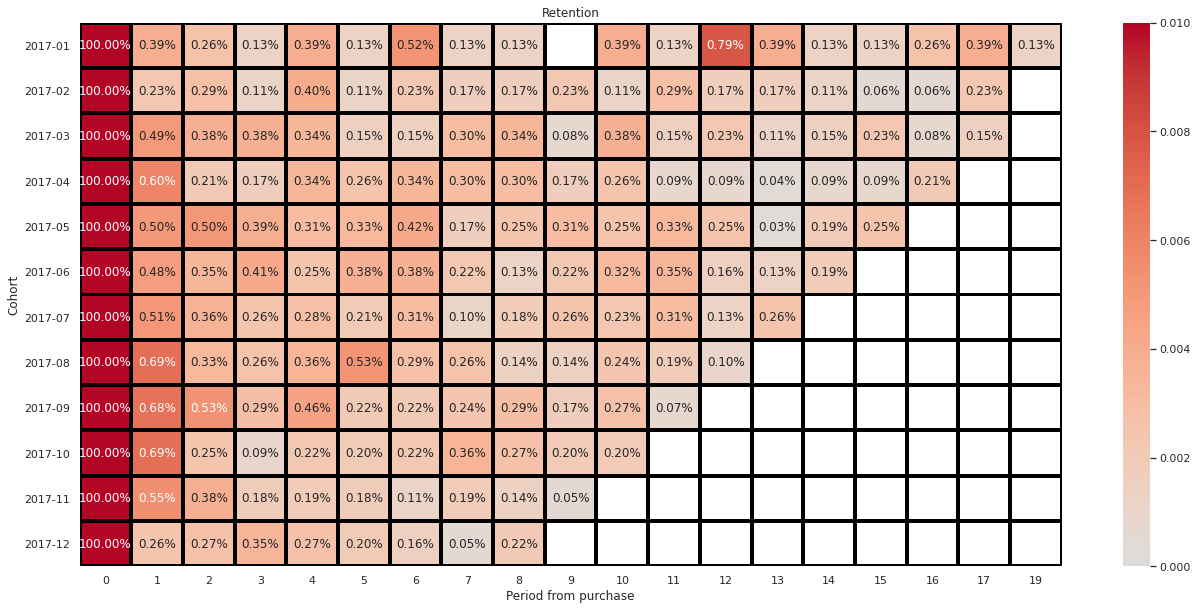

In [261]:
sns.heatmap(retention,  
            annot=True,
            fmt='.2%',
            center=0,
            vmin=0.0, 
            vmax=0.01,
            cmap= 'coolwarm',
           linewidths=3, linecolor='black')
plt.title('Retention')
plt.xlabel('Period from purchase')
plt.ylabel('Cohort')

## Задание_6: Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю.

Recency Frequency Monetary
- Recency(давность) — давность сделки: чем меньше времени прошло с момента последней активности клиента, тем больше вероятность, что он повторит
- Frequency (частота) - количество сделок: чем больше каких-либо действий совершил клиент, тем больше вероятность того, что он его повторит в будущем
- Monetary (деньги) — сумма сделок: чем больше денег было потрачено, тем больше вероятность того, что он сделает заказ
    

Как и в заданиях выше буду считать завершенным заказ со статусом "delivered"

In [262]:
customers_df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-g-georgij-45/first_project/olist_customers_dataset.csv')
orders_df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-g-georgij-45/first_project/olist_orders_dataset.csv')
product_df = pd.read_csv('olist_order_items_dataset.csv')
#Заново считываем датасеты, чтобы случайно не взять уже исправленный датасет из заданий выше

In [263]:
customer_order_df = orders_df.merge(customers_df, on = 'customer_id' ).fillna(0)
all_data = customer_order_df.merge(product_df, how = 'left', on = 'order_id')
all_deliv = all_data.query('order_status == "delivered"')
all_deliv.head()
#Мержим датасеты

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


Временные рамки данных:

In [264]:
print('Заказы производились с {} по {}'.format(all_deliv['order_purchase_timestamp'].min(),
                                    all_deliv['order_purchase_timestamp'].max()))

Заказы производились с 2016-09-15 12:16:38 по 2018-08-29 15:00:37


In [265]:
all_deliv['order_purchase_timestamp'] = pd.to_datetime(all_deliv['order_purchase_timestamp']) 
#Переводим в формат datetime для работы с датой

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [266]:
today = all_deliv['order_purchase_timestamp'].max() + timedelta(days=1)
today
#Последняя покупка в датасете датируется 29 сентября 2018 года - возьмем за today последнюю дату покупки + 1 день

Timestamp('2018-08-30 15:00:37')

Соберем данные в RFM-таблицу:

In [271]:
RFM_table = all_deliv.groupby('customer_unique_id') \
    .agg({'order_purchase_timestamp': lambda x: (today - x.max()).days, 
                                                 'product_id': lambda x: len(x), 
                                                 'price': lambda x: x.sum()}) \
    .rename(columns = {'order_purchase_timestamp' :'recency', 'product_id' :'frequency','price' : 'monetary'}).reset_index()

В классическом RFM подходе пользователей сегментируют по шкале от 1 балла до 4 баллов, поэтому я сегментирую пользователей на 4 категории: до 25, 25-50, 50-75, 75 и выше

In [ ]:
quantiles = RFM_table.quantile(q=[0.25,0.5,0.75]).to_dict()

Сегментируем пользователей:

In [273]:
def r_score(a,b,c):
    if a <= c[b][0.25]:
        return 4
    elif a <= c[b][0.50]:
        return 3
    elif a <= c[b][0.75]:
        return 2
    else:
        return 1

def fm_score(a,b,c):
    if a <= c[b][0.25]:
        return 1
    elif a <= c[b][0.50]:
        return 2
    elif a <= c[b][0.75]: 
        return 3
    else:
        return 4

RFM_table['r_quartile'] = RFM_table['recency'].apply(r_score, args=('recency',quantiles,))
RFM_table['f_quartile'] = RFM_table['frequency'].apply(fm_score, args=('frequency',quantiles,))
RFM_table['m_quartile'] = RFM_table['monetary'].apply(fm_score, args=('monetary',quantiles,))
RFM_table['RFMClass'] = RFM_table.r_quartile.map(str) + RFM_table.f_quartile.map(str) + RFM_table.m_quartile.map(str)
RFM_table

,customer_unique_id,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFMClass
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,4,1,3,413
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90,3,1,1,311
2,0000f46a3911fa3c0805444483337064,537,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,2,1,4,214
...,...,...,...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,447,2,1570.00,1,4,4,144
93354,fffea47cd6d3cc0a88bd621562a9d061,262,1,64.89,2,1,2,212
93355,ffff371b4d645b6ecea244b27531430a,568,1,89.90,1,1,3,113
93356,ffff5962728ec6157033ef9805bacc48,119,1,115.00,3,1,3,313


## Интерпретация RFM-анализа:
    
Лучшие клиенты - RFMClass 444 Покупают больше других и часто возвращаются, очевидно, что довольны продуктом. Таким клиентам можно направлять подборки товаров, различные рекламные и акционные предложения. Предлагаем им особые условия, программу лояльности и т.д.

In [ ]:
RFM_table[RFM_table['RFMClass']=='444'].head()

RFMClass 441 Клиенты, которые часто возвращаются, но средний чек по ним достаточно низок, можно попытаться увеличить их средний чек направляя им рассылки с интересующими их товарами.

In [ ]:
RFM_table[RFM_table['RFMClass']=='441'].head()

RFMClass 344 Клиенты, с высоким чеком, но которые возвращаются реже. Нужно попытаться узнать, в чем дело - попросить их поучаствовать в опросе. Также отправляем им рассылки с интересными акциями и предложениями.

In [ ]:
RFM_table[RFM_table['RFMClass']=='344'].head()

RFMClass 341 Клиенты, которых можно также назвать постояными, но с маленьким чеком. Также отправляем им  опросник и рассылки с интересными акциями.

In [ ]:
RFM_table[RFM_table['RFMClass']=='341'].head()

RFMClass 241 - 244 Клиенты, которых можем потерять. Отправляем им реактивационные письма, запрашиваем обратную связь, предлагаем бонусы, программы лояльности. 

In [ ]:
RFM_table[RFM_table['RFMClass']=='244'].head() 

RFMClass 113 - 114 Скорее всего "случайные клиенты", купившие у нас один раз, но с хорошим чеков. Таких клиентов нужно попытаться привлечь, поэтому даем им различные бонусы и интересные предложения, чтобы они заглядывали к нам почаще.

In [ ]:
RFM_table[RFM_table['RFMClass']=='114'].head() 

RFMClass 112 - 111 Либо "одноразовые" пользователи, либо пользователи которые уже ушли от нас, не стоит тратить на них слишком больших усилий. Отправляем им рассылки, пока они от них не отпишутся:)

In [ ]:
RFM_table[RFM_table['RFMClass']=='111'].head() 